In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
images_path = '../../Data.nosync/Zalando_Dataset/dresses/images/raw_images/'

In [3]:
df = pd.read_json('../../Data.nosync/Zalando_Dataset/dresses/metadata/dresses_metadata.json').T.reset_index().rename(columns = {'index':'ID'})
df

,ID,url,brand,garment_type,color,fabric,fit,neckline,pattern,collar,length
0,GE221C0GK-K11,https://www.zalando.co.uk/gestuz-frilly-long-d...,Gestuz,denim_dress,blue,Denim,Slim Fit,Backless,None,Standing Collar,Long
1,ON321C3EU-K11,https://www.zalando.co.uk/only-onlrouge-34-rin...,ONLY,denim_dress,grey,Denim,Slim Fit,None,Plain,Turn-down Collar,Short
2,TOB21C0CD-K11,https://www.zalando.co.uk/tommy-jeans-slim-bel...,Tommy Jeans,denim_dress,blue,Denim,Regular Fit,None,Plain,Turn-down Collar,Short
3,TOB21C0AY-K11,https://www.zalando.co.uk/tommy-jeans-badge-mi...,Tommy Jeans,denim_dress,blue,Denim,Regular Fit,None,None,Turn-down Collar,Short
4,H7C21C005-O11,https://www.zalando.co.uk/hermanandco-denim-dr...,HERMAN&CO,denim_dress,brown,Denim,Regular Fit,None,Plain,Turn-down Collar,Short
...,...,...,...,...,...,...,...,...,...,...,...
3233,HU721C0O8-J11,https://www.zalando.co.uk/hugo-nassari-day-dre...,HUGO,work_dress,red,Jersey,Slim Fit,Crew neck,Plain,None,Short
3234,LAR21C05I-O11,https://www.zalando.co.uk/lauren-ralph-lauren-...,Lauren Ralph Lauren Petite,work_dress,brown,Jersey,Slim Fit,None,Plain,Standing Collar,Knee-length
3235,L4221C1RD-C11,https://www.zalando.co.uk/lauren-ralph-lauren-...,Lauren Ralph Lauren,work_dress,brown,None,Slim Fit,Crew neck,Other,None,Knee-length
3236,A0F21C0EE-C11,https://www.zalando.co.uk/abercrombie-and-fitc...,Abercrombie & Fitch,work_dress,grey,None,Slim Fit,Low-cut v-neck,Marl,None,Extra short


In [4]:
def plot_category_counts(cat):
    fig, ax = plt.subplots(figsize = (6,3))
    with plt.style.context("fivethirtyeight"):
        df[cat].value_counts(dropna = False).plot(kind = 'bar', ax = ax)
        plt.title(f'Counts of {cat}')
        plt.xticks(rotation=45)
        plt.show()

def plot_samples(cat):
    cat_values = df[cat].unique().tolist()
    fig, ax = plt.subplots(1, len(cat_values), figsize = (30,5))
    for i, category in enumerate(cat_values):
        sub_df = df[df[cat] == category]
        if sub_df.shape[0] != 0:
            img_path = sub_df.sample(1).ID.item()
            img = Image.open(images_path + img_path + '.jpg')
            ax[i].imshow(img)
        ax[i].axis('off')
        ax[i].set_title(category)

### Brands

In [5]:
df.brand.nunique()

299

In [6]:
df.brand.value_counts().sort_values(ascending = False).head(10)

WAL G.                 147
Mango                  123
ONLY                    85
b.young                 77
Vero Moda               73
Lauren Ralph Lauren     68
Fransa                  64
YAS                     56
VILA                    56
ICHI                    56
Name: brand, dtype: int64

### Garment Type

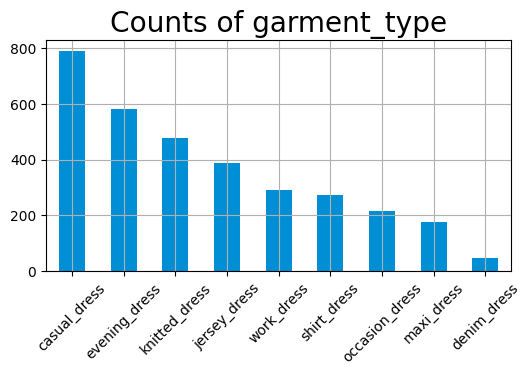

In [7]:
plot_category_counts('garment_type')

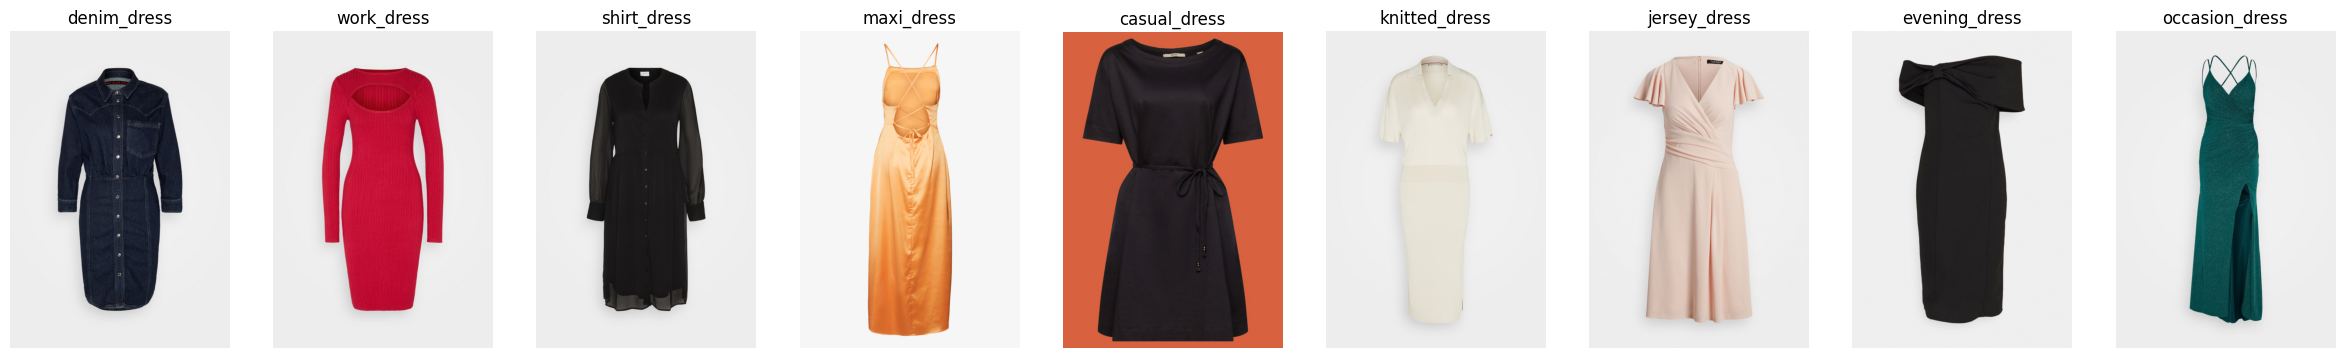

In [8]:
plot_samples('garment_type')

### Color

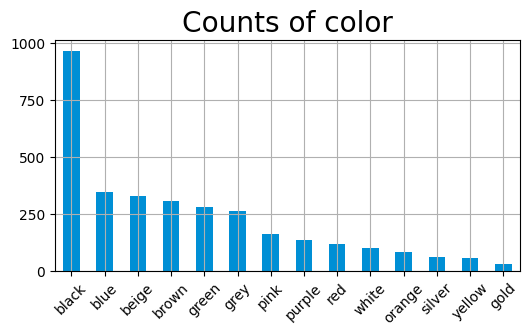

In [9]:
plot_category_counts('color')

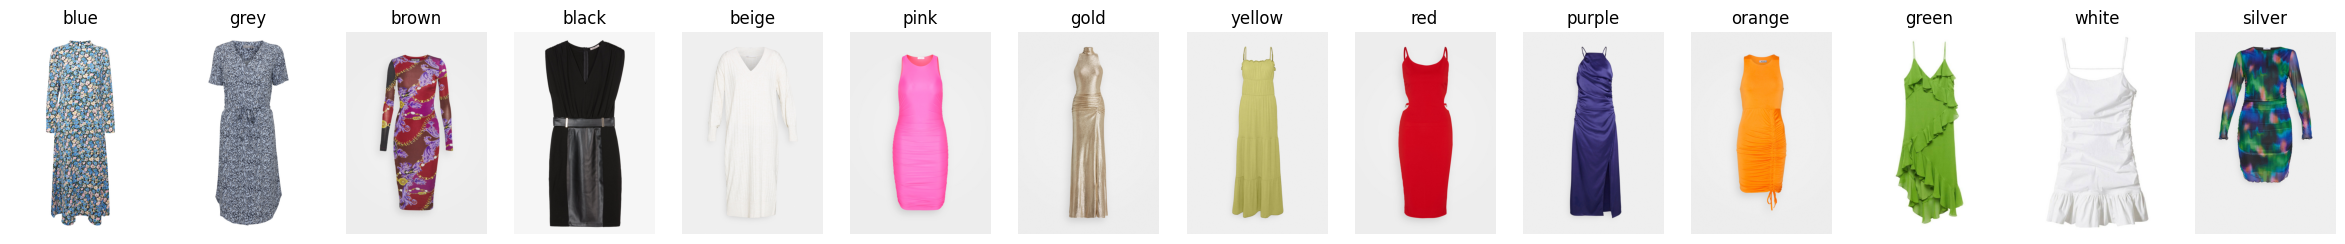

In [10]:
plot_samples('color')

### Fabric

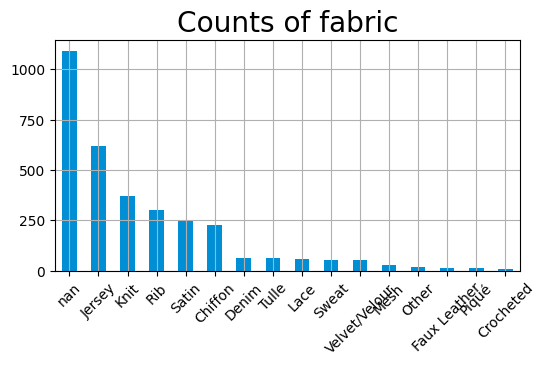

In [11]:
plot_category_counts('fabric')

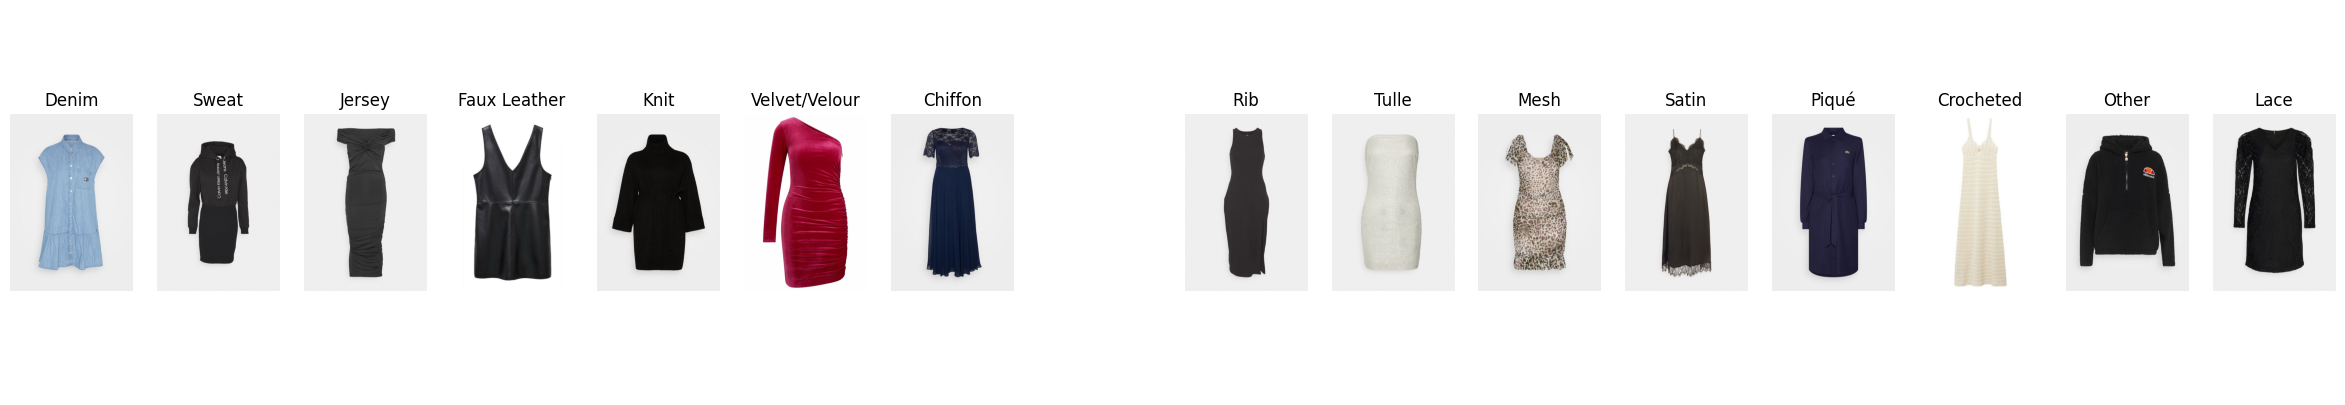

In [12]:
plot_samples('fabric')

### Pattern

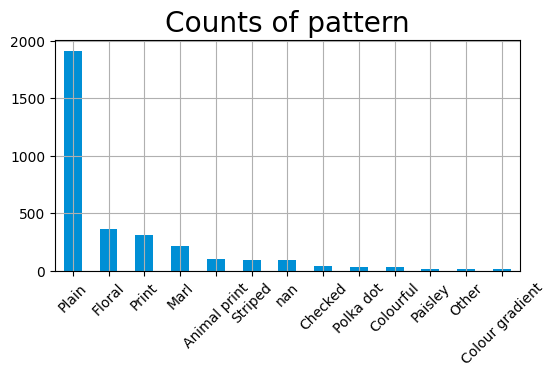

In [13]:
plot_category_counts('pattern')

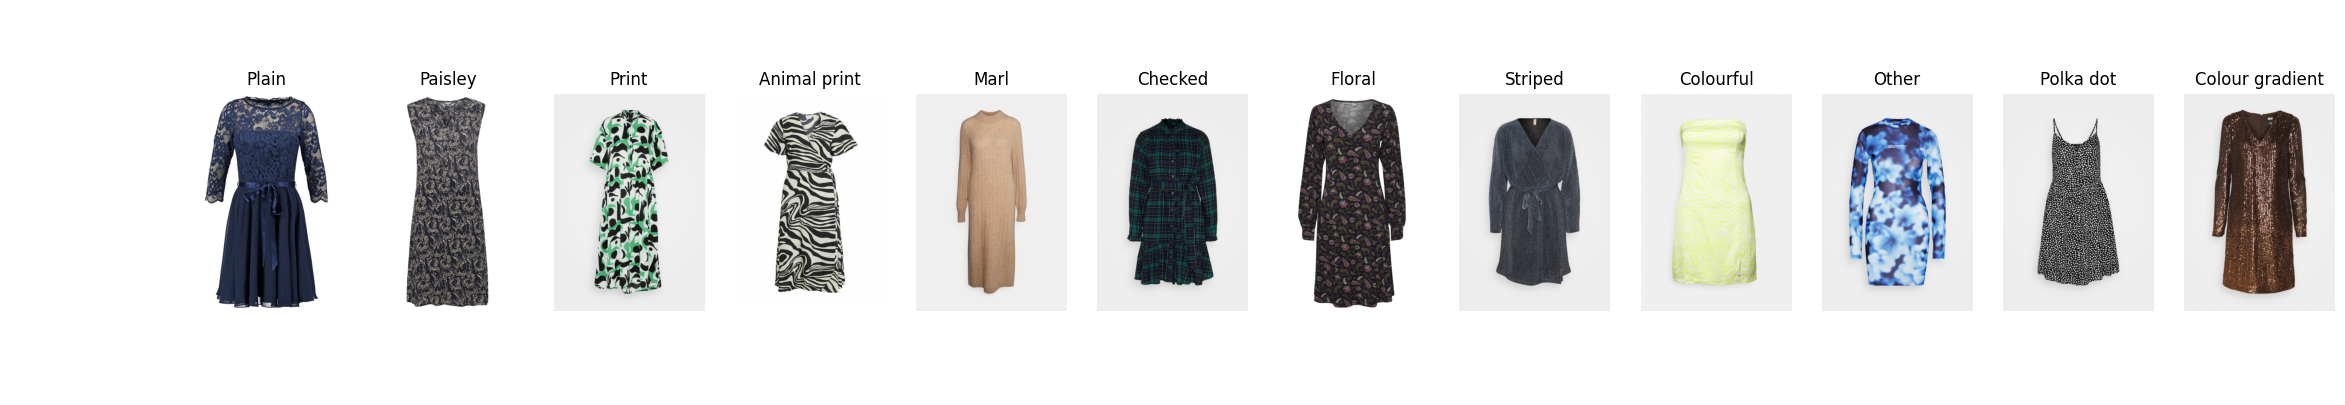

In [14]:
plot_samples('pattern')

### Collar

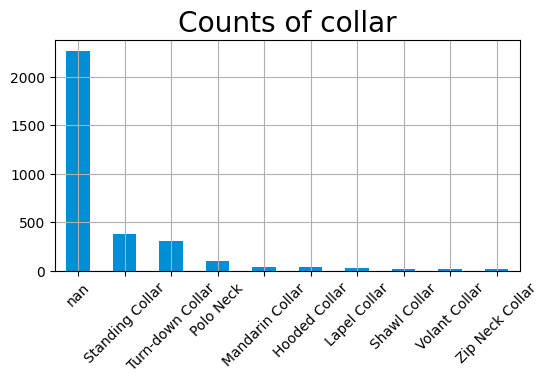

In [15]:
plot_category_counts('collar')

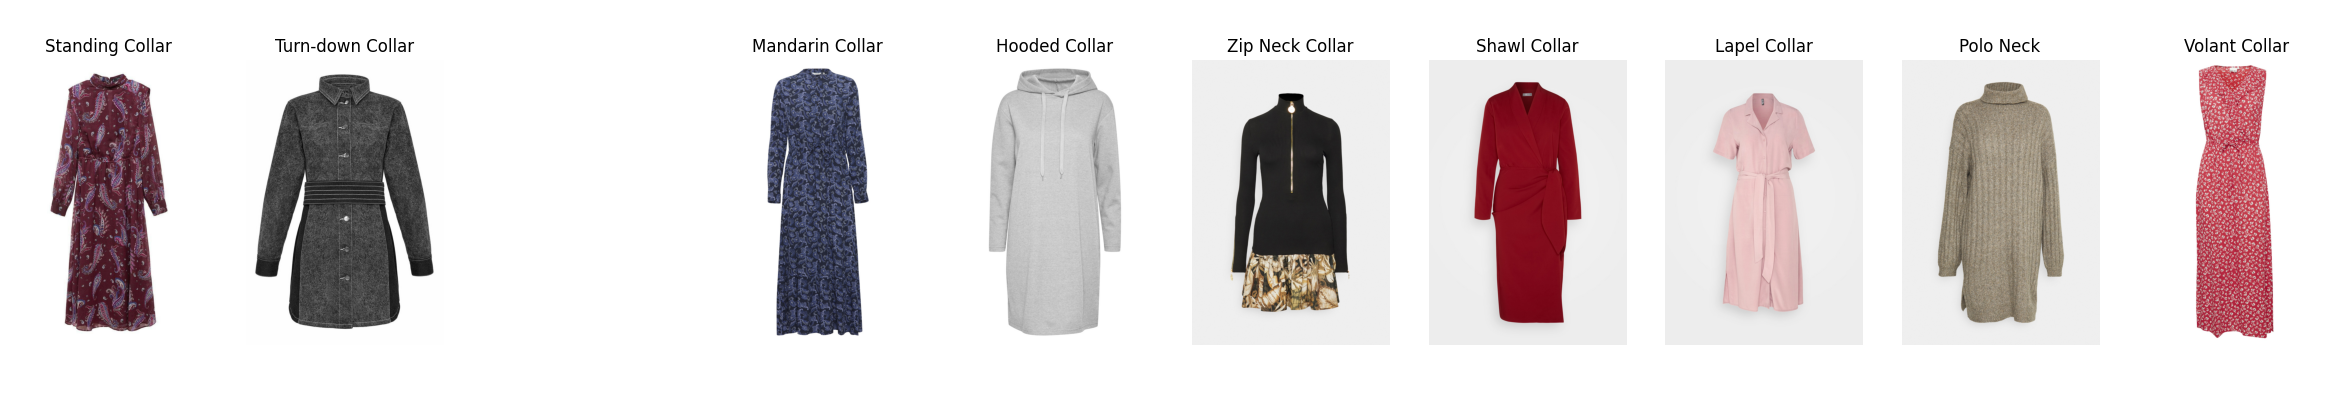

In [16]:
plot_samples('collar')

### Length

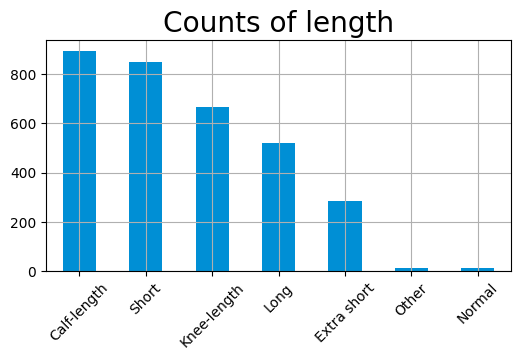

In [17]:
plot_category_counts('length')

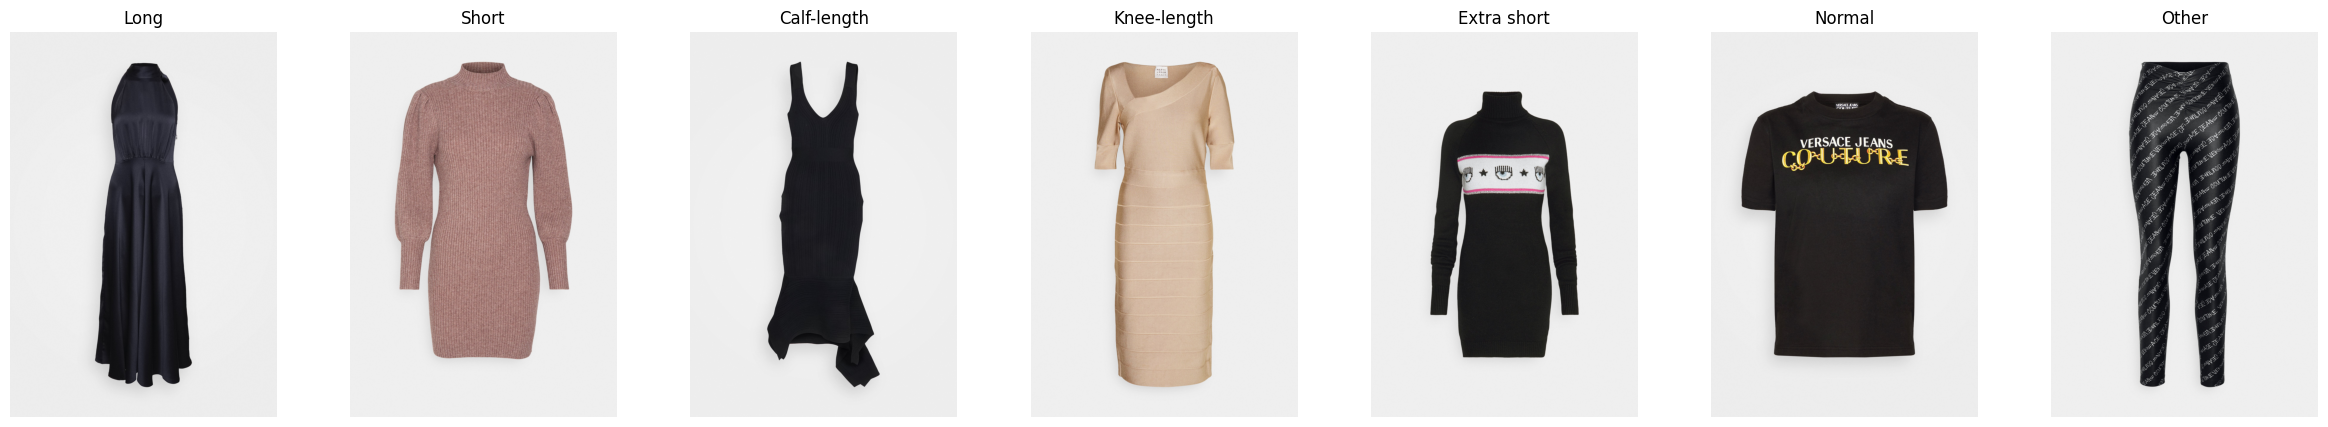

In [18]:
plot_samples('length')